In [1]:
from bs4 import BeautifulSoup as bs

In [3]:
import requests as req

### Airbnb needs API to scrape data

In [4]:
#url_npage = req.get('https://www.airbnb.fr/s/Maroc/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&price_filter_input_type=0&price_filter_num_nights=28&query=Maroc&place_id=ChIJjcVRlmGICw0Rw_8sxIGT09k&date_picker_type=flexible_dates&flexible_trip_dates%5B%5D=january&flexible_trip_lengths%5B%5D=one_month&source=structured_search_input_header&search_type=filter_change&price_max=150&federated_search_session_id=3c65d5f8-b654-4a6b-bf61-65a5bd519fbb&pagination_search=true&items_offset=20&section_offset=3')

In [5]:
#url = req.get('https://www.airbnb.fr/s/Maroc/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&price_filter_input_type=0&price_filter_num_nights=28&query=Maroc&place_id=ChIJjcVRlmGICw0Rw_8sxIGT09k&date_picker_type=flexible_dates&flexible_trip_dates%5B%5D=january&flexible_trip_lengths%5B%5D=one_month&source=structured_search_input_header&search_type=filter_change&price_max=150')

## Maroc Annonces

In [90]:
url = req.get('https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=3')

In [91]:
sp = bs(url.content,'lxml')

In [92]:
print(sp.find('div', class_="holder"))
print(sp.find('em', class_="date").text)

<div class="holder">
<h3>
                    Appartement À Louer À Iberia Tanger
                </h3>
<strong class="price">13 000 DH</strong>
<span class="location">Tanger / Centre ville</span>
</div>


                                			
                                    16 Sep 2022 19:44




In [93]:
ul = sp.find('ul',class_="cars-list")
li = ul.find_all('li')
li[0]

<li class="firstitem">
<a href="categorie/321/Appartements/annonce/9220587/Appartement-À-Louer-À-Iberia-Tanger.html" title="Appartement À Louer À Iberia Tanger">
<div class="block_img">
<img alt="Appartement À Louer À Iberia Tanger" class="lazy" data-original="/user_images/321/8946239.jpg" height="100" width="148"/>
</div>
<div class="holder">
<h3>
                    Appartement À Louer À Iberia Tanger
                </h3>
<strong class="price">13 000 DH</strong>
<span class="location">Tanger / Centre ville</span>
</div>
</a>
<div class="time">
<em class="date">
<em class="date">
                                			
                                    16 Sep 2022 <br/><span>19:44</span>
</em>
</em>
<span class="like_ads like0" rel="9220587" title="Favoris"></span>
</div>
</li>

In [94]:
len(li)

21

In [95]:
type(li)

bs4.element.ResultSet

In [126]:
for i,info in enumerate(li):
    # fetching text from tag and remove whitespaces
    if len(info.get_text(strip=True)) != 0:
        # Remove empty tag
        info.extract()
        
        if len(info.get_text(strip=True)) != 0:
            info.extract()
            if (info.strong):
                #print(i,info.h3,',',info.span,',',info.strong,',',info.em,'\n')
                print(i,info.h3.text.strip(),',',info.span.text,',',info.strong.text,',',info.em.text.strip(),'\n')

0 Appartement À Louer À Iberia Tanger , Tanger / Centre ville , 13 000 DH , 16 Sep 2022 19:44 

1 Appartement À Louer À Nejma Tanger , Tanger / Centre ville , 9 000 DH , 16 Sep 2022 19:44 

2 Appartement meublé , Tanger / Moulay Youssef , 6 500 DH , 15 Sep 2022 22:50 

3 Location Apt meublé tanger , Tanger / M nar , 3 000 DH , 15 Sep 2022 21:17 

4 Appartement meublé , Tanger / Moulay Youssef , 6 500 DH , 15 Sep 2022 21:13 

5 Bel Appartement meublé prés centre ville. , Tanger / Centre ville , 3 000 DH , 15 Sep 2022 17:24 

6 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 500 DH , 15 Sep 2022 11:10 

8 Appartement à louer Tanger , Tanger / Centre ville , 4 000 DH , 14 Sep 2022 19:17 

9 Location un appartement meublé , Tanger / Moulay Youssef , 4 700 DH , 13 Sep 2022 20:34 

10 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 500 DH , 12 Sep 2022 10:44 

11 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 5

In [110]:
f = open('tanger1.csv',mode='w')
header = "Title,City,Price,Time\n"
f.write(header)

22

In [113]:
  
for i,info in enumerate(li):
    if len(info.get_text(strip=True)) != 0:
        info.extract()
        
        if len(info.get_text(strip=True)) != 0:
            info.extract()
            if (info.strong):
                f.write(info.h3.text.strip() + ',' + info.span.text +
                        ',' + info.strong.text + ',' + info.em.text.strip() +'\n')
        
f.close()

In [114]:
import pandas as pd

In [134]:
data = pd.read_csv('tanger1.csv',encoding="ISO-8859-1")

In [119]:
#data['Location'] = data['City'].str[:6]
#data.rename(columns={'Price':'Price Dhs'},inplace=True)
#data

In [78]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
import matplotlib.pyplot as plt

### Extract data from 2-10 pages 

## Tanger

In [79]:
for page_num in range(2,11):
    url2 = 'https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge={page_num}'.format(page_num=page_num)
    print(url2)

https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=3
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=4
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=5
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=6
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=7
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=8
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=9
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=10


In [84]:
c = open('Rent_Analysis/tanger.csv',mode='w',encoding="utf-8")
header = "Title,City,Price,Time\n"
c.write(header)

for page_num in range(2,11):
    url2 = req.get(
        'https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge={page_num}' \
        .format(page_num=page_num)
    )
    sp = bs(url2.content,'lxml')    
    ul = sp.find('ul',class_="cars-list")
    li = ul.find_all('li')    

            
#    for i,info in enumerate(li):
#        if len(info.get_text(strip=True)) != 0:
#            info.extract()
#            if len(info.get_text(strip=True)) != 0:
#                info.extract()
#                if (info.strong):
#                    #print(i,info.h3,',',info.span,',',info.strong,',',info.em,'\n')
#                    print(i,info.h3.text.strip(),',',info.span.text,',',info.strong.text,',',info.em.text.strip(),'\n')
                
    for i,info in enumerate(li):
        if len(info.get_text(strip=True)) != 0:
            info.extract()
            if (info.strong):
                print(i,info.h3.text.strip(),',',info.span.text,',',info.strong.text,',',info.em.text.strip(),'\n')
                
    #print('=============================================', page_num ,'===================================================\n')  

                c.write(info.h3.text.strip() + ',' + info.span.text +
                        ',' + info.strong.text + ',' + info.em.text.strip() +'\n')
c.close() 

0 Appartement meublé pour la location , Tanger , 5 000 DH , 08 Oct 2022 06:00 

1 Appartement meublé neuf , Tanger / Centre ville , 5 000 DH , 08 Oct 2022 05:58 

2 A louer super appartement meublé neuf , Tanger / Centre ville , 5 500 DH , 07 Oct 2022 15:59 

3 à louer un appartement meublé , Tanger / Centre ville , 4 500 DH , 07 Oct 2022 15:55 

4 شقه مجهزة للكراء فالمستقبل قرب أسواق السلام , Tanger / Marjane , 3 000 DH , 07 Oct 2022 13:18 

5 Appartement usage bureau pour la location , Tanger , 4 800 DH , 06 Oct 2022 13:15 

6 Appartement meublé pour la location , Tanger , 5 700 DH , 06 Oct 2022 13:12 

8 Appartement luxe haute standing meuble , Tanger / Malabata , 14 000 DH , 05 Oct 2022 18:47 

9 Appartement en location haute standing a malabata , Tanger / Malabata , 8 000 DH , 05 Oct 2022 16:09 

10 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 500 DH , 05 Oct 2022 09:54 

11 Appartement à louer Tanger Irfane pour filles , Tanger / Aviation , 2 800 DH 

0 Location appartement 56m2 tanger , Tanger / Malabata , 1 800 DH , 24 Jun 2022 22:01 

1 Location un appartement , Tanger / Malabata , 3 000 DH , 24 Jun 2022 22:01 

2 A louer super  appartement meublé neuf , Tanger / Val Fleuri , 5 000 DH , 24 Jun 2022 10:02 

3 شقة عائلية للكراء مشمسة بوسط المدينة , Tanger / Centre ville , 3 200 DH , 20 Jun 2022 12:48 

5 Appartement a louer val fleuri , Tanger , 600 DH , 20 Jun 2022 11:24 

6 A louer super appartement meublé , Tanger / Val Fleuri , 5 000 DH , 15 Jun 2022 09:11 

7 Appartement a louer , Tanger , 750 DH , 14 Jun 2022 11:57 

8 Appartement à louer , Tanger / Centre ville , 500 DH , 13 Jun 2022 11:47 

9 Appartement a louer , Tanger / Centre ville , 750 DH , 10 Jun 2022 19:50 

10 Appartement à louer , Tanger / Centre ville , 500 DH , 07 Jun 2022 13:24 

11 Location un appartement , Tanger / Aviation , 2 500 DH , 03 Jun 2022 16:39 

12 Appartement a louer , Tanger / Centre ville , 750 DH , 03 Jun 2022 12:53 

13 Appartement équipé AU C

In [85]:
#Read the csv file was created
pd.set_option("display.max_rows",200)
tanger_data = pd.read_csv('Rent_Analysis/tanger.csv')
tanger_data

,Title,City,Price,Time
0,Appartement meublé pour la location,Tanger,5 000 DH,08 Oct 2022 06:00
1,Appartement meublé neuf,Tanger / Centre ville,5 000 DH,08 Oct 2022 05:58
2,A louer super appartement meublé neuf,Tanger / Centre ville,5 500 DH,07 Oct 2022 15:59
3,à louer un appartement meublé,Tanger / Centre ville,4 500 DH,07 Oct 2022 15:55
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3 000 DH,07 Oct 2022 13:18
5,Appartement usage bureau pour la location,Tanger,4 800 DH,06 Oct 2022 13:15
6,Appartement meublé pour la location,Tanger,5 700 DH,06 Oct 2022 13:12
7,Appartement luxe haute standing meuble,Tanger / Malabata,14 000 DH,05 Oct 2022 18:47
8,Appartement en location haute standing a malabata,Tanger / Malabata,8 000 DH,05 Oct 2022 16:09
9,Appartement Centre Ville Prêt Mall ibn Battoutta,Tanger / Centre ville,500 DH,05 Oct 2022 09:54


## Casablanca

In [4]:
url_casa = req.get('https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=2')

In [82]:
for page_num in range(2,11):
    url_casa ='https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge={page_num}'\
        .format(page_num=page_num)
    print(url_casa)

https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=3
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=4
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=5
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=6
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=7
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=8
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=9
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=10


In [207]:
for i,info_c in enumerate(li_casa):
    if len(info_c.get_text(strip=True)) != 0:
        info_c.extract()
        if (info_c.strong):
            print(i,info_c.h3.text.strip(),',',info_c.span.text,',',info_c.strong.text,',',info_c.em.text.strip(),'\n')

1 Appartement eco meublé , Casablanca / Dar Bouazza , 2 300 DH , 22 Oct 2022 21:34 

2 Appartement à louer à nakhail 100 m² , Casablanca / Sidi Maarouf , 5 000 DH , 22 Oct 2022 16:51 

3 Jolie appartement à louer à florida 75 , Casablanca / Sidi Maarouf , 3 500 DH , 22 Oct 2022 16:50 

4 Appt meublé a Ain sbaa , Casablanca / Ain Sebaa , 3 300 DH , 22 Oct 2022 16:50 

5 Bel appartement à louer à hafeed el khair 100 m² , Casablanca / Sidi Maarouf , 3 800 DH , 22 Oct 2022 16:50 

7 Appartement à louer longue durée , Casablanca / Oulfa , 4 000 DH , 22 Oct 2022 00:10 

8 Appartement 126m² 3 chambres à Val Fleuri , Casablanca / Val Fleuri , 7 900 DH , 21 Oct 2022 19:27 

9 Location appartement , Casablanca , 5 000 DH , 21 Oct 2022 19:27 

10 Location Appartement à L krimat , Casablanca / Ain Chok , 4 800 DH , 21 Oct 2022 19:27 

11 Appartement Meublé à Louer El Jadida , Casablanca , 4 000 DH , 21 Oct 2022 19:27 

12 Bel Appartement au lotissement Al Mostaqbal , Casablanca / Sidi Maarouf , 2 

In [86]:
casa_data = open('Rent_Analysis/casa.csv',mode="w",encoding="utf-8")
header = "Title,City,Price,Time\n"
casa_data.write(header)

for page_num in range(2,11):
    url_casa = req.get(
        'https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge={page_num}'\
        .format(page_num=page_num)
    )
    casa = bs(url_casa.content,'lxml')
    ul_casa = casa.find('ul',class_="cars-list")
    li_casa = ul_casa.find_all('li')
    
    for i,info_c in enumerate(li_casa):
        if len(info_c.get_text(strip=True)) != 0:
            info_c.extract()
            if (info_c.strong):
                print(i,info_c.h3.text.strip(),',',info_c.span.text,',',info_c.strong.text,',',info_c.em.text.strip(),'\n')
            
                casa_data.write(info_c.h3.text.strip() + ',' +  info_c.span.text + ',' + 
                           info_c.strong.text + ',' + info_c.em.text.strip() + '\n')
    
    
casa_data.close()

0 Appt  meubléalouer pour les filles a roches noires , Casablanca / Roches Noires , 5 000 DH , 27 Oct 2022 19:48 

1 Appartement en location meublé sur 2 m , Casablanca / 2 Mars , 7 500 DH , 27 Oct 2022 19:47 

2 Appartement en location meublésûr ziraoui , Casablanca / Lyautey , 8 000 DH , 27 Oct 2022 19:47 

4 Appartement en location meublé sur 2 mars , Casablanca / 2 Mars , 7 500 DH , 27 Oct 2022 19:47 

5 Appartement en location meublé à côté m , Casablanca / Bourgogne , 7 000 DH , 27 Oct 2022 19:47 

6 Appartement bien situé à louer à Oulfa Azhar , Casablanca / Oulfa , 2 250 DH , 27 Oct 2022 19:47 

7 Appartement meublée a louer au quartier les prince , Casablanca / Maarif Extension , 8 000 DH , 27 Oct 2022 12:30 

8 Appartement 200m² 3ch terrasse à Riviera , Casablanca / Riviera , 9 000 DH , 27 Oct 2022 12:30 

9 Très bel appartement a louer a Bourgogne , Casablanca / Bourgogne , 4 700 DH , 27 Oct 2022 11:49 

10 Bel Appartement à louer-Lotissement Al Moustakbal , Casablanca / Sid

14 Appartement meublé riad raha , Casablanca / Lissasfa , 4 000 DH , 17 Oct 2022 21:55 

15 Appartement 2Pc Salon Quartier Val Fleuri , Casablanca / Val Fleuri , 6 000 DH , 17 Oct 2022 21:55 

16 Appartement en location à mazola , Casablanca / Mazola , 4 500 DH , 17 Oct 2022 21:55 

17 Appartement neuf moderne à louer , Casablanca / Ain Sebaa , 5 000 DH , 17 Oct 2022 17:25 

18 Appartement meublé a louer oasis , Casablanca / Oasis , 7 000 DH , 17 Oct 2022 17:24 

19 Appartement meublé à oasis , Casablanca / Oasis , 7 200 DH , 17 Oct 2022 17:24 

20 Appartement a louer sur maarif 80m , Casablanca / Maarif , 6 000 DH , 17 Oct 2022 17:23 

0 Appartement moderne a florida sidi maarouf , Casablanca / Sidi Maarouf , 5 000 DH , 17 Oct 2022 17:23 

1 Grand loft jardin mardock 180m , Casablanca / 2 Mars , 7 500 DH , 17 Oct 2022 17:22 

2 Grand studios équipe meublée , Casablanca / Belvédère , 6 000 DH , 17 Oct 2022 17:22 

3 Apprtte equipe meublé , Casablanca / Belvédère , 5 000 DH , 17 Oct 202

In [87]:
casa_data = pd.read_csv('Rent_Analysis/casa.csv',error_bad_lines=False)
casa_data


C:\Users\pc\AppData\Local\Temp\ipykernel_20764\3353785086.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  casa_data = pd.read_csv('Rent_Analysis/casa.csv',error_bad_lines=False)
b'Skipping line 23: expected 4 fields, saw 6\nSkipping line 24: expected 4 fields, saw 6\nSkipping line 25: expected 4 fields, saw 6\nSkipping line 40: expected 4 fields, saw 6\nSkipping line 41: expected 4 fields, saw 6\nSkipping line 42: expected 4 fields, saw 6\nSkipping line 43: expected 4 fields, saw 6\nSkipping line 51: expected 4 fields, saw 6\nSkipping line 80: expected 4 fields, saw 6\nSkipping line 142: expected 4 fields, saw 5\nSkipping line 154: expected 4 fields, saw 6\nSkipping line 155: expected 4 fields, saw 6\n'


,Title,City,Price,Time
0,Appt meubléalouer pour les filles a roches no...,Casablanca / Roches Noires,5 000 DH,27 Oct 2022 19:48
1,Appartement en location meublé sur 2 m,Casablanca / 2 Mars,7 500 DH,27 Oct 2022 19:47
2,Appartement en location meublésûr ziraoui,Casablanca / Lyautey,8 000 DH,27 Oct 2022 19:47
3,Appartement en location meublé sur 2 mars,Casablanca / 2 Mars,7 500 DH,27 Oct 2022 19:47
4,Appartement en location meublé à côté m,Casablanca / Bourgogne,7 000 DH,27 Oct 2022 19:47
5,Appartement bien situé à louer à Oulfa Azhar,Casablanca / Oulfa,2 250 DH,27 Oct 2022 19:47
6,Appartement meublée a louer au quartier les pr...,Casablanca / Maarif Extension,8 000 DH,27 Oct 2022 12:30
7,Appartement 200m² 3ch terrasse à Riviera,Casablanca / Riviera,9 000 DH,27 Oct 2022 12:30
8,Très bel appartement a louer a Bourgogne,Casablanca / Bourgogne,4 700 DH,27 Oct 2022 11:49
9,Bel Appartement à louer-Lotissement Al Moustakbal,Casablanca / Sidi Maarouf,2 700 DH,27 Oct 2022 10:46


## Rabat

In [220]:
for page_num in range(2,11):
    url_rabat = 'https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge={page_num}'\
    .format(page_num=page_num)
    print(url_rabat)

https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=3
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=4
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=5
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=6
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=7
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=8
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=9
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=10


In [239]:
for i,info_r in enumerate(li_rabat):
    if len(info_r.get_text(strip=True)) != 0:
        info_r.extract()
        if (info_r.strong):
            print(i,info_r.h3.text.strip(),',',info_r.span.text,',',info_r.strong.text,',',info_r.em.text.strip(),'\n')        

0 APPARTEMENT à location par mois , Rabat / Agdal , 8 500 DH , 20 Oct 2022 20:50 

1 COQUET APPARTEMENT 2 PIÈCES MEUBLÉ , Rabat / Hassan , 5 500 DH , 20 Oct 2022 20:50 

2 Location ht agdal pres de descartes , Rabat / Agdal , 10 500 DH , 20 Oct 2022 13:11 

4 APPARTEMENT MEUBLE PROCHE LA GARE RABAT VILLE , Rabat / Hassan , 7 500 DH , 19 Oct 2022 11:06 

5 APPARTEMENT DE 6 PIÈCES à AGDAL , Rabat / Agdal , 17 500 DH , 19 Oct 2022 11:06 

6 Appartement meublée en location à Agdal , Rabat / Agdal , 8 500 DH , 19 Oct 2022 11:03 

7 BEL APPARTEMENT FAIT 120M² A LOUER , Rabat / Agdal , 7 800 DH , 19 Oct 2022 11:03 

8 Appart duplexe meublé à louer Wifak Temara , Rabat , 4 800 DH , 18 Oct 2022 16:15 

9 APPARTEMENT A LA HAUT AGDAL A LOUER , Rabat / Agdal , 12 500 DH , 18 Oct 2022 10:54 

10 Appartement meublé en location à AGDAL , Rabat / Agdal , 8 500 DH , 18 Oct 2022 10:54 

11 HAUT AGDAL APPARTEMENT USAGE BUREAU , Rabat / Agdal , 17 000 DH , 17 Oct 2022 17:22 

12 APPARTEMENT 3P MEUBLE A PL

In [88]:
rabat_data = open('Rent_Analysis/rabat.csv',mode="w",encoding="utf-8")
header = "Title,City,Price,Time\n"
rabat_data.write(header)

for page_num in range(2,11):
    url_rabat = req.get(
        'https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge={page_num}'\
        .format(page_num=page_num)
    )
    rabat = bs(url_rabat.content,'lxml')
    ul_rabat = rabat.find('ul',class_="cars-list")
    li_rabat = ul_rabat.find_all('li')
    
    for i,info_r in enumerate(li_rabat):
        if len(info_r.get_text(strip=True)) != 0:
            info_r.extract()
            if (info_r.strong):
                print(i,info_r.h3.text.strip(),',',info_r.span.text,',',info_r.strong.text,',',info_r.em.text.strip(),'\n')        
    
                rabat_data.write(info_r.h3.text.strip() + ',' +  info_r.span.text + ',' + 
                           info_r.strong.text + ',' + info_r.em.text.strip() + '\n')


rabat_data.close()

0 APPARTEMENT A LOUER A HAY EL MANEH RABAT 4 PIECES , Rabat / Yacoub El Mansour , 5 000 DH , 26 Oct 2022 11:08 

2 APPARTEMENT 3P MEUBLE A PLACE PETRI RABAT , Rabat / Hassan , 7 500 DH , 25 Oct 2022 10:40 

3 Un grande appartement en location à DIOUR JAMAA , Rabat / Diour Jamaa , 5 500 DH , 25 Oct 2022 10:40 

5 PETIT STUDIO MEUBLÉE A LOUER , Rabat / Agdal , 4 200 DH , 25 Oct 2022 10:40 

6 Appartement meublé à Prestigia ensoleillé , Rabat , 15 500 DH , 25 Oct 2022 10:39 

7 APPARTEMENT VIDE A MABELLA , Rabat / Mabella , 6 500 DH , 24 Oct 2022 15:24 

8 Appartement vide à louer fait 120m² , Rabat , 6 500 DH , 24 Oct 2022 15:24 

9 Appartement meublée en location , Rabat / Agdal , 7 500 DH , 24 Oct 2022 15:05 

10 Appartement standing prrstigia5800dh , Rabat / Agdal , 5 800 DH , 23 Oct 2022 16:21 

11 STUDIO MEUBLÉE A 4500/MOIS , Rabat / Agdal , 4 500 DH , 22 Oct 2022 16:52 

12 Appartementa agdal rabat , Rabat / Agdal , 7 890 DH , 22 Oct 2022 00:10 

13 Duplex meublé à Hassan Rabat a l

0 Trés bel appartement à saisir , Rabat / Hay Ryad , 12 500 DH , 17 Sep 2022 16:15 

1 Appartement meublée au centre de Rabat , Rabat / Hassan , 8 000 DH , 16 Sep 2022 21:01 

2 Appartement a hassan , Rabat / Hassan , 8 000 DH , 16 Sep 2022 21:01 

3 Location triplex  meublé à Harhoura, Temara , Rabat / Agdal , 12 000 DH , 16 Sep 2022 19:40 

4 Appartement meublé à  Hay Riad Rabat , Rabat / Agdal , 18 000 DH , 16 Sep 2022 19:40 

6 LE HAUT AGDAL APPARTEMENT A LOUER , Rabat / Agdal , 8 000 DH , 15 Sep 2022 13:33 

7 PAS LOIN DE LYCÉE DESCARTES DANS UN IMMEUBLE PROPR , Rabat , 8 500 DH , 15 Sep 2022 13:33 

8 APPARTEMENT A RABAT AGDAL , Rabat / Agdal , 4 800 DH , 15 Sep 2022 13:33 

9 Appt meublé , Rabat / Agdal , 7 000 DH , 15 Sep 2022 11:05 

10 APPATEMENT A LOUER , Rabat / Agdal , 111 111 DH , 14 Sep 2022 11:24 

11 Appartement centre ville rabat , Rabat / Agdal , 3 800 DH , 14 Sep 2022 05:42 

12 Appartement 4 pièces , Rabat / Agdal , 4 500 DH , 14 Sep 2022 05:42 

13 APPATEMENT A LO

In [89]:
rabat_data = pd.read_csv('Rent_Analysis/rabat.csv',error_bad_lines=False)
rabat_data

C:\Users\pc\AppData\Local\Temp\ipykernel_20764\602461306.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  rabat_data = pd.read_csv('Rent_Analysis/rabat.csv',error_bad_lines=False)
b'Skipping line 42: expected 4 fields, saw 5\nSkipping line 47: expected 4 fields, saw 5\nSkipping line 66: expected 4 fields, saw 5\nSkipping line 102: expected 4 fields, saw 5\n'


,Title,City,Price,Time
0,APPARTEMENT A LOUER A HAY EL MANEH RABAT 4 PIECES,Rabat / Yacoub El Mansour,5 000 DH,26 Oct 2022 11:08
1,APPARTEMENT 3P MEUBLE A PLACE PETRI RABAT,Rabat / Hassan,7 500 DH,25 Oct 2022 10:40
2,Un grande appartement en location à DIOUR JAMAA,Rabat / Diour Jamaa,5 500 DH,25 Oct 2022 10:40
3,PETIT STUDIO MEUBLÉE A LOUER,Rabat / Agdal,4 200 DH,25 Oct 2022 10:40
4,Appartement meublé à Prestigia ensoleillé,Rabat,15 500 DH,25 Oct 2022 10:39
5,APPARTEMENT VIDE A MABELLA,Rabat / Mabella,6 500 DH,24 Oct 2022 15:24
6,Appartement vide à louer fait 120m²,Rabat,6 500 DH,24 Oct 2022 15:24
7,Appartement meublée en location,Rabat / Agdal,7 500 DH,24 Oct 2022 15:05
8,Appartement standing prrstigia5800dh,Rabat / Agdal,5 800 DH,23 Oct 2022 16:21
9,STUDIO MEUBLÉE A 4500/MOIS,Rabat / Agdal,4 500 DH,22 Oct 2022 16:52


## Any other City

In [251]:
def input_city_url_here(url,data_name):
    data = open(data_name+'.csv',mode="w",encoding="utf-8")
    header = "Title,City,Price,Time\n"
    data.write(header)

    for page_num in range(2,11):
        url = req.get(
            url+'={page_num}'.format(page_num=page_num)
        )
        sp = bs(url.content,'lxml')
        ul = sp.find('ul',class_="cars-list")
        li = ul.find_all('li')
    
        for i,info in enumerate(li):
            if len(info.get_text(strip=True)) != 0:
                info.extract()
                if (info.strong):
                    #print(i,info.h3.text.strip(),',',info.span.text,',',info.strong.text,',',info.em.text.strip(),'\n')        
    
                    data.write(info.h3.text.strip() + ',' +  info.span.text + ',' + 
                           info.strong.text + ',' + info.em.text.strip() + '\n')

    data.close()

In [253]:
#input_city_url_here("https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge","rabat_test")

## Analyse (Rabat , Casablanca , Tanger)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
tanger_data 


,Title,City,Price,Time
0,Appartement meublé pour la location,Tanger,5 000 DH,08 Oct 2022 06:00
1,Appartement meublé neuf,Tanger / Centre ville,5 000 DH,08 Oct 2022 05:58
2,A louer super appartement meublé neuf,Tanger / Centre ville,5 500 DH,07 Oct 2022 15:59
3,à louer un appartement meublé,Tanger / Centre ville,4 500 DH,07 Oct 2022 15:55
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3 000 DH,07 Oct 2022 13:18
5,Appartement usage bureau pour la location,Tanger,4 800 DH,06 Oct 2022 13:15
6,Appartement meublé pour la location,Tanger,5 700 DH,06 Oct 2022 13:12
7,Appartement luxe haute standing meuble,Tanger / Malabata,14 000 DH,05 Oct 2022 18:47
8,Appartement en location haute standing a malabata,Tanger / Malabata,8 000 DH,05 Oct 2022 16:09
9,Appartement Centre Ville Prêt Mall ibn Battoutta,Tanger / Centre ville,500 DH,05 Oct 2022 09:54


In [36]:
tanger_data.shape , casa_data.shape , rabat_data.shape

((177, 4), (164, 4), (173, 4))

In [91]:
tanger_data.head()

,Title,City,Price,Time
0,Appartement meublé pour la location,Tanger,5 000 DH,08 Oct 2022 06:00
1,Appartement meublé neuf,Tanger / Centre ville,5 000 DH,08 Oct 2022 05:58
2,A louer super appartement meublé neuf,Tanger / Centre ville,5 500 DH,07 Oct 2022 15:59
3,à louer un appartement meublé,Tanger / Centre ville,4 500 DH,07 Oct 2022 15:55
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3 000 DH,07 Oct 2022 13:18


In [92]:
casa_data.head()

,Title,City,Price,Time
0,Appt meubléalouer pour les filles a roches no...,Casablanca / Roches Noires,5 000 DH,27 Oct 2022 19:48
1,Appartement en location meublé sur 2 m,Casablanca / 2 Mars,7 500 DH,27 Oct 2022 19:47
2,Appartement en location meublésûr ziraoui,Casablanca / Lyautey,8 000 DH,27 Oct 2022 19:47
3,Appartement en location meublé sur 2 mars,Casablanca / 2 Mars,7 500 DH,27 Oct 2022 19:47
4,Appartement en location meublé à côté m,Casablanca / Bourgogne,7 000 DH,27 Oct 2022 19:47


In [93]:
rabat_data.head()

,Title,City,Price,Time
0,APPARTEMENT A LOUER A HAY EL MANEH RABAT 4 PIECES,Rabat / Yacoub El Mansour,5 000 DH,26 Oct 2022 11:08
1,APPARTEMENT 3P MEUBLE A PLACE PETRI RABAT,Rabat / Hassan,7 500 DH,25 Oct 2022 10:40
2,Un grande appartement en location à DIOUR JAMAA,Rabat / Diour Jamaa,5 500 DH,25 Oct 2022 10:40
3,PETIT STUDIO MEUBLÉE A LOUER,Rabat / Agdal,4 200 DH,25 Oct 2022 10:40
4,Appartement meublé à Prestigia ensoleillé,Rabat,15 500 DH,25 Oct 2022 10:39


### Concat all this csv 

In [94]:
cities = pd.concat([tanger_data,casa_data,rabat_data])

In [95]:
#pd.set_option('display.max_rows',600)
cities.head()

,Title,City,Price,Time
0,Appartement meublé pour la location,Tanger,5 000 DH,08 Oct 2022 06:00
1,Appartement meublé neuf,Tanger / Centre ville,5 000 DH,08 Oct 2022 05:58
2,A louer super appartement meublé neuf,Tanger / Centre ville,5 500 DH,07 Oct 2022 15:59
3,à louer un appartement meublé,Tanger / Centre ville,4 500 DH,07 Oct 2022 15:55
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3 000 DH,07 Oct 2022 13:18


In [96]:
cities.to_csv('cities.csv')

## Data Cleaning

### Missig values

In [97]:
cities.isnull().sum()

Title    0
City     0
Price    0
Time     0
dtype: int64

In [98]:
#plt.boxplot(cities['Price'])
cities['Price'] = cities['Price'].str.replace('DH','')
cities['Price'] = cities['Price'].str.replace(' ','')
cities['Price'] = pd.to_numeric(cities['Price'])
cities

,Title,City,Price,Time
0,Appartement meublé pour la location,Tanger,5000,08 Oct 2022 06:00
1,Appartement meublé neuf,Tanger / Centre ville,5000,08 Oct 2022 05:58
2,A louer super appartement meublé neuf,Tanger / Centre ville,5500,07 Oct 2022 15:59
3,à louer un appartement meublé,Tanger / Centre ville,4500,07 Oct 2022 15:55
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3000,07 Oct 2022 13:18
...,...,...,...,...
168,Appartement meublé/ agdal,Rabat / Agdal,16000,24 Aoû 2022 22:50
169,Appartement meublé à louer à Agdal RABAT,Rabat / Agdal,10000,24 Aoû 2022 22:50
170,Appartement à harhoura,Rabat / Harhoura,6000,24 Aoû 2022 22:49
171,Coquette appartement refaite à neuf à Hassan,Rabat / Hassan,7500,24 Aoû 2022 22:49


In [99]:
cities.dtypes

Title    object
City     object
Price     int64
Time     object
dtype: object

### Outliers

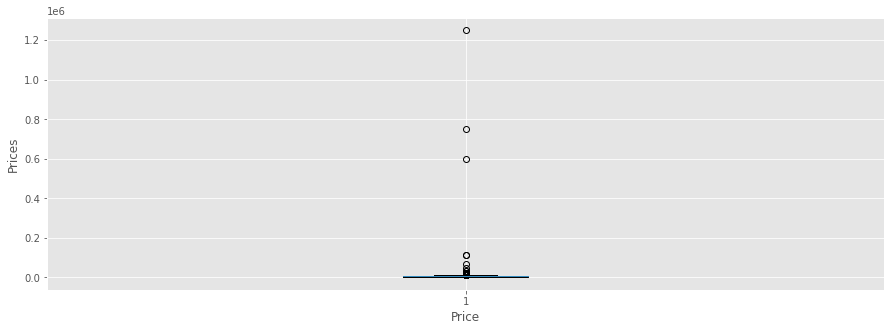

In [100]:
plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.boxplot(cities['Price'])
plt.xlabel('Price')
plt.ylabel('Prices')
plt.show()

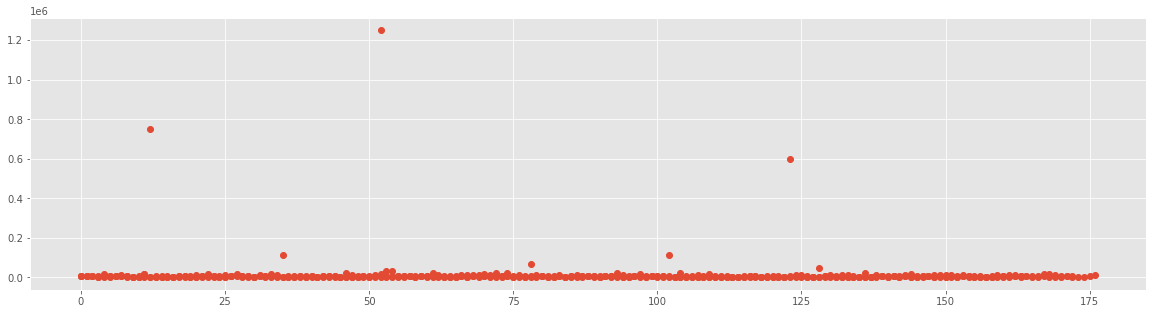

In [47]:
plt.figure(figsize=(20,5))
plt.plot(cities['Price'],'o')
plt.show()

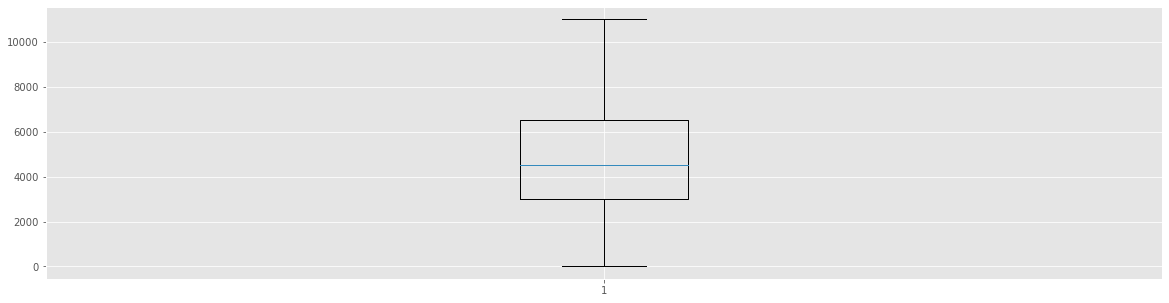

In [101]:
plt.figure(figsize=(20,5))
plt.boxplot(cities.Price[~(cities['Price']>=11500)])
plt.show()

In [102]:
cities[cities['Price']>=11500].shape , cities[~(cities['Price']>=11500)].shape

((55, 4), (460, 4))

In [103]:
#Without Outliers
cities = cities[~(cities['Price']>=11500)]

### Duplicated

In [104]:
cities.shape , cities[~cities.duplicated()].shape , cities[cities.duplicated()].shape

((460, 4), (458, 4), (2, 4))

In [105]:
#Without Duplicated Rows
cities = cities[~cities.duplicated()]

## Data Preparation

### Split city column

In [53]:
import numpy as np

In [106]:
cities['City1'] = cities['City'].apply(lambda x:x.split('/')[0].replace(' ',''))

In [107]:
cities['Street'] = np.nan

In [108]:
cities['Street'] = cities['City'].apply(lambda x:x.split(' / ')[-1])

In [109]:
cities

,Title,City,Price,Time,City1,Street
0,Appartement meublé pour la location,Tanger,5000,08 Oct 2022 06:00,Tanger,Tanger
1,Appartement meublé neuf,Tanger / Centre ville,5000,08 Oct 2022 05:58,Tanger,Centre ville
2,A louer super appartement meublé neuf,Tanger / Centre ville,5500,07 Oct 2022 15:59,Tanger,Centre ville
3,à louer un appartement meublé,Tanger / Centre ville,4500,07 Oct 2022 15:55,Tanger,Centre ville
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3000,07 Oct 2022 13:18,Tanger,Marjane
...,...,...,...,...,...,...
166,Appartement hay nahda,Rabat / Hay Ennahda,4600,25 Aoû 2022 10:01,Rabat,Hay Ennahda
169,Appartement meublé à louer à Agdal RABAT,Rabat / Agdal,10000,24 Aoû 2022 22:50,Rabat,Agdal
170,Appartement à harhoura,Rabat / Harhoura,6000,24 Aoû 2022 22:49,Rabat,Harhoura
171,Coquette appartement refaite à neuf à Hassan,Rabat / Hassan,7500,24 Aoû 2022 22:49,Rabat,Hassan


### Last step

In [110]:
cities.to_csv('Rent_Analysis/cities_clean.csv')

In [ ]:
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=2

## Decision,Insights

In [113]:
cities = pd.read_csv('cities_clean.csv')
cities.shape

(459, 7)

In [115]:
cities.groupby('City1').mean()['Price']

City1
Casablanca    4573.631579
Rabat         6395.687943
Tanger        3817.656627
Name: Price, dtype: float64

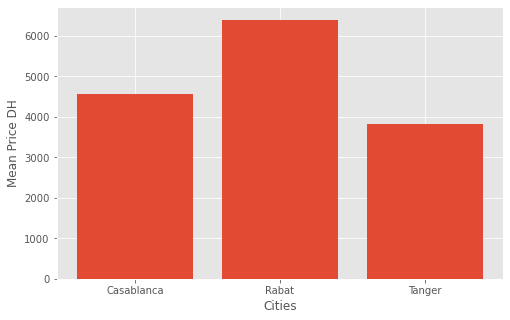

In [116]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
plt.xlabel('Cities')
plt.ylabel('Mean Price DH')

x = cities.groupby('City1').mean().index
y = cities.groupby('City1').mean()['Price']
plt.bar(x,y)
plt.show()

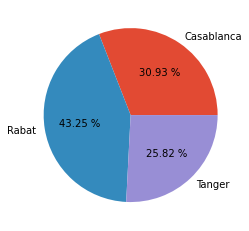

In [117]:
plt.pie(cities.groupby('City1').mean()['Price'],autopct='%.2f %%',labels=cities.groupby('City1').mean().index)
plt.show()